# Regresja wielomianowa

In [6]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [7]:
# Przydatne funkcje

def cost(theta, X, y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()

def gradient(theta, X, y):
    """Wersja macierzowa gradientu funkcji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-7):
    """Algorytm gradientu prostego (wersja macierzowa)"""
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print('Algorithm does not converge!')
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

def plot_data(X, y, xlabel, ylabel):
    """Wykres danych (wersja macierzowa)"""
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

def plot_fun(fig, fun, X):
    """Wykres funkcji `fun`"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = fun(Arg)
    return ax.plot(Arg, Val, linewidth='2')

In [8]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv('data_flats.tsv', header=0, sep='\t',
                          usecols=['price', 'rooms', 'sqrMetres'])
data = np.matrix(alldata[['sqrMetres', 'price']])

In [9]:
# Funkcja regresji wielomianowej

def h_poly(Theta, x):
    """Funkcja wielomianowa"""
    return sum(theta * np.power(x, i) for i, theta in enumerate(Theta.tolist()))

def get_poly_data(data, deg):
    m, n_plus_1 = data.shape
    n = n_plus_1 - 1

    X1 = data[:, 0:n]
    X1 /= np.amax(X1, axis=0)

    Xs = [np.ones((m, 1)), X1]

    for i in range(2, deg+1):
        Xn = np.power(X1, i)
        Xn /= np.amax(Xn, axis=0)
        Xs.append(Xn)

    X = np.matrix(np.concatenate(Xs, axis=1)).reshape(m, deg * n + 1)

    y = np.matrix(data[:, -1]).reshape(m, 1)

    return X, y


def polynomial_regression(X, y, n):
    """Funkcja regresji wielomianowej"""
    theta_start = np.matrix([0] * (n+1)).reshape(n+1, 1)
    theta, logs = gradient_descent(cost, gradient, theta_start, X, y)
    return lambda x: h_poly(theta, x)

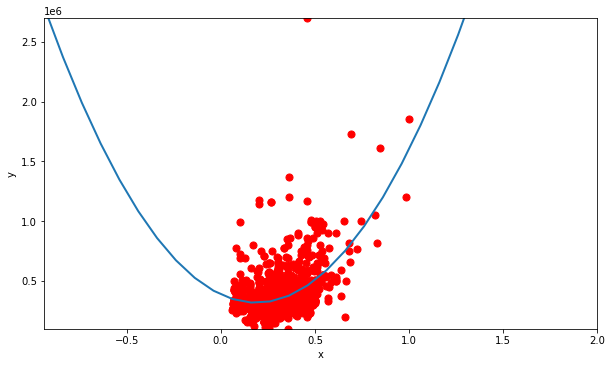

In [10]:
n = 2
x, y = get_poly_data(data, n)
fig = plot_data(x, y, xlabel='x', ylabel='y')
plot_fun(fig, polynomial_regression(x, y, n), x)